# Exercise 7

# Part 1 - DT

## Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [288]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [289]:
# read the data and set "datetime" as the index
url = 'bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [290]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [291]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [292]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [293]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

El numero total de rentas promedio de bicicletas para un día laboral es de 193.01 y 188.50 para no laborales.

In [294]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

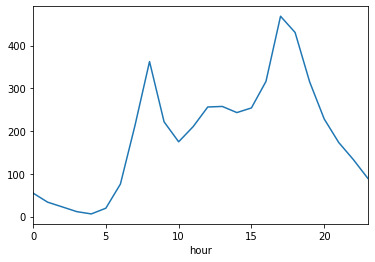

In [295]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

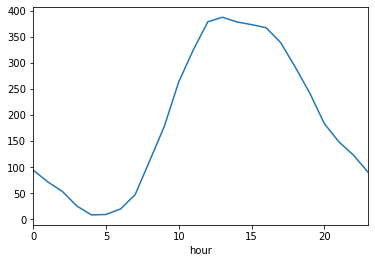

In [296]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

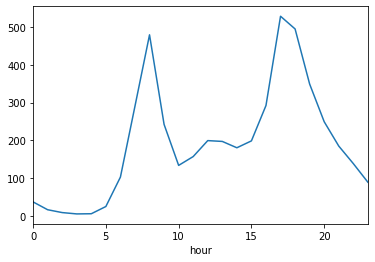

In [297]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

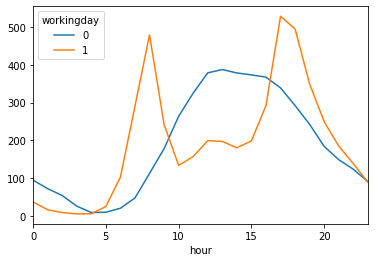

In [298]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Es posible observar que el numero de rentas promedio alcanza un primer pico a las 8 am con 362 y el pico máximo se alcanza a las 5 pm con 468 rentas de bicicletas en promedio. Así mismo, se observa el valle entre las 10 am y las 3 pm, y el descenso constante desde las 5 pm.

Para los días no laborales se muestra una tendecia muy similar respecto al promedio general, donde se aprecia el crecimiento
de las rentas entre las 5 am y las 3 pm, luego de estas horas la tendencia es a la baja.

Para los días no laborales la tendencia muestra el crecimiento de las rentas de bicicletas entre las 5 am y las 12 pm, alcanzando su pico máximo alrededor de las 375 rentas en promedio cerca de las 12 pm, luego de estas horas la tendencia es a la baja.

Es claro que el comportamiento de los día no laborales es diferente al comportamiento de los días laborales, donde los picos para la renta promedio se alcanzan en momentos distintos. En general, se puede presumir que la renta de bicicletas concuerda con los horarios de entrada y salida en los días laborales y con las horas de esparcimiento de los fines de semana.

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [299]:
X = bikes.loc[: , ["hour" ,"workingday" ]]
y = bikes.loc[: , ["total" ]]
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
reg.coef_

array([[10.49206282,  4.07248627]])

En una regresión lineal, los coeficientes brindarán o restaran importancia a una variable a medida de que esta crezca o disminuya. Es decir, para la variable *workingday* el  total de biciclitas rentadas incrementará en 4.072, conservando todo lo demás constante, si es un día laboral. Sin embargo, no funcionaria de la misma forma para la variable *hour*, dado que el pico se ve presentando en valores como 8, 16, 17, 18 y 19 y no en 22 o 23. Por lo tanto, esta estrategia de modelación no captura el comportamiento de horas valle y horas pico como debería.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [300]:
# read the data and set "datetime" as the index
url = 'bikeshare.csv'
bikes = pd.read_csv(url)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [301]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)


In [302]:
# create "hour" as its own feature
bikes['hour'] = pd.to_numeric(pd.to_datetime(bikes['datetime']).dt.hour)


In [377]:
X = bikes.loc[: , ["hour" ,"workingday" ]]
y = bikes.loc[: , ["total" ]] 

In [304]:
# calculate RMSE for those predictions
from sklearn import metrics
import numpy as np

In [305]:
# define a function that calculates the RMSE for a given split of miles
def split_rg(name, p, X, y):
    train = pd.concat([X, y], axis=1)
    x_lower = train[train[name] < p].total.mean()
    x_higher = train[train[name] >= p].total.mean()
    
    train['prediction'] = np.where(train[name] < p, x_lower, x_higher)
    
    if train['prediction'].count() > 2:
        return np.sqrt(metrics.mean_squared_error(y['total'], train.prediction))
    else:
        return [0]

In [306]:
def best_split(X, y):
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, RMSE
    split = 0
    
    # For all features
    for j in features:
        
        x_range = list()
        x_range = X.iloc[:,j]
        x_range = np.unique(x_range)
        print(j, sum(x_range))
        if sum(x_range) == 0:
            best_split = [0, 0, 0]
            return best_split
        else:    
            RMSE = [split_rg(X.columns[j], x_i, X, y) for x_i in x_range]
            split = int(sum(np.where(RMSE == min(RMSE))))
        
        
        if min(RMSE) < best_split[2] or j==0:
            best_split = [j, split, min(RMSE)]
    
    return best_split

In [307]:
def tree_grow(X, y, level=0, min_rmse=0.001, max_depth=None):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, RMSE=0)
        return tree
    
    # Calculate the best split
    j, split, RMSE = best_split(X, y)
    
    # save tree and estimate prediction
    y_pred = y.mean()
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], RMSE=RMSE)
    
    # Check stooping criteria
    if (RMSE < min_rmse) or  best_split == [0, 0, 0]:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    print(level)
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_rmse=min_rmse, max_depth=max_depth)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_rmse=min_rmse, max_depth=max_depth)
    
    return tree

In [346]:
tree = tree_grow(X, y, level=0, min_rmse=0.001, max_depth=7)

0 276
1 1
0
0 21
1 1
1
0 15
1 1
2
0 1
1 1
3
0 1
1 0
0 1
1 1
4
0 0
0 1
1 1
5
0 0
0 1
1 1
6
0 0
0 1
1 1
0 14
1 1
3
0 14
1 0
0 14
1 1
4
0 2
1 1
5
0 0
0 2
1 1
6
0 0
0 2
1 1
0 12
1 1
5
0 0
0 12
1 1
6
0 0
0 12
1 1
0 6
1 1
2
0 6
1 0
0 6
1 1
3
0 0
0 6
1 1
4
0 0
0 6
1 1
5
0 0
0 6
1 1
6
0 0
0 6
1 1
0 255
1 1
1
0 70
1 1
2
0 0
0 70
1 1
3
0 0
0 70
1 1
4
0 0
0 70
1 1
5
0 0
0 70
1 1
6
0 0
0 70
1 1
0 185
1 1
2
0 0
0 185
1 1
3
0 0
0 185
1 1
4
0 0
0 185
1 1
5
0 0
0 185
1 1
6
0 0
0 185
1 1


In [347]:
tree

{'y_pred': total    191.574132
 dtype: float64, 'y_prob': total    191.539034
 dtype: float64, 'level': 0, 'split': [0,
  7], 'n_samples': 10886, 'RMSE': 150.2256006040568, 'sl': {'y_pred': total    32.582032
  dtype: float64,
  'y_prob': total    32.561605
  dtype: float64,
  'level': 1,
  'split': [0, 6],
  'n_samples': 3139,
  'RMSE': 35.244269462270296,
  'sl': {'y_pred': total    25.17772
   dtype: float64, 'y_prob': total    25.159345
   dtype: float64, 'level': 2, 'split': [0,
    2], 'n_samples': 2684, 'RMSE': 27.46590337533088, 'sl': {'y_pred': total    44.510451
    dtype: float64,
    'y_prob': total    44.413831
    dtype: float64,
    'level': 3,
    'split': [1, 1],
    'n_samples': 909,
    'RMSE': 30.69400580610836,
    'sl': {'y_pred': total    83.2
     dtype: float64, 'y_prob': total    82.633562
     dtype: float64, 'level': 4, 'split': -1, 'n_samples': 290, 'RMSE': 0},
    'sr': {'y_pred': total    26.384491
     dtype: float64, 'y_prob': total    26.301127
     dt

In [348]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])
    print(tree['split'])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            print(len(predicted),sum(tree['y_pred']))

            
            predicted = predicted * sum(tree['y_pred'])
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]
        print(len(predicted))

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
            
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
            
        
    return predicted    

In [349]:
prediction = tree_predict(X, tree, proba=False)

[0, 7]
10886
[0, 6]
3139
[0, 2]
2684
[1, 1]
909
-1
290 83.2
[0, 1]
619
-1
310 36.73225806451613
[0, 0]
309
[0, 0]
309
-1
309 16.003236245954692
[1, 1]
1775
-1
574 24.273519163763066
[0, 3]
1201
[0, 0]
305
[0, 0]
305
-1
305 8.436065573770492
[0, 2]
896
[0, 2]
896
-1
896 11.842633928571429
[1, 1]
455
-1
145 19.99310344827586
[0, 0]
310
[0, 0]
310
[0, 0]
310
[0, 0]
310
-1
310 102.57741935483871
[0, 14]
7747
[0, 2]
3187
[0, 2]
3187
[0, 2]
3187
[0, 2]
3187
[0, 2]
3187
-1
3187 242.54188892375274
[0, 6]
4560
[0, 6]
4560
[0, 6]
4560
[0, 6]
4560
[0, 6]
4560
-1
4560 265.39912280701753


In [350]:
from sklearn.metrics import accuracy_score

y_true = y
y_pred = prediction

np.sqrt(metrics.mean_squared_error(y_true, y_pred))

149.01055361520503

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [378]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE.append( np.mean(np.sqrt(-scores)))
RMSE

[150.58047729549764,
 142.79903210731652,
 136.77375465075121,
 132.43260320072835,
 117.66091036003505,
 108.63388688155047,
 107.64196789476493,
 107.59630102700518,
 107.58012231930059,
 107.57576561312104,
 107.57576561312104,
 107.57576561312104,
 107.57576561312104,
 107.57576561312104,
 107.57576561312104,
 107.57576561312104,
 107.57576561312104,
 107.57576561312104,
 107.57576561312104,
 107.57576561312104]

Text(0, 0.5, 'RMSE')

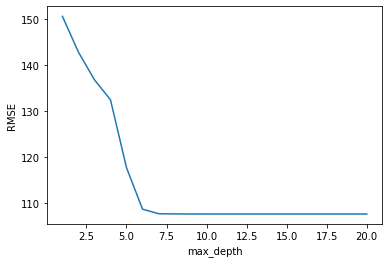

In [379]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt 

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE)
plt.xlabel('max_depth')
plt.ylabel('RMSE')

In [380]:
# show the best accuracy and the corresponding max_depth
sorted(zip(RMSE, max_depth_range),reverse=True)[::-1][0]

(107.57576561312104, 10)

In [381]:
# max_depth=10 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [362]:
# compute feature importances
feature_cols = X.columns
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance')

,feature,importance
1,workingday,0.18495
0,hour,0.81505


In [ ]:
pd.Series(cross_val_score(treereg, X, y, cv=10)).describe()

El modelo de arbol de regresión usando la librería tree de sklearn logra un mejor indicador del RMSE para la profundidad óptima vs el modelo construido manualmente. En parte se debe a la opción de cross validation, a mayores particiones o folds el modelo obtiene la profundidad ideal, que para el caso en mención correspondío a 7 usando 10 folds, lo que arrojó un RMSE de 107.57, superando el del modelo manual RMSE = 149.01, valor que se asemeja más al modelo tree de profundidad 2. 

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [543]:
df = pd.read_csv('mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [365]:
df.shape

(6000, 61)

In [793]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [700]:
y.mean()

0.5

In [794]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [702]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier()}

In [703]:

for model in models.keys():
    models[model].fit(X_train, y_train)

In [704]:
# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [705]:
models.keys()

dict_keys(['lr', 'dt'])

In [706]:
# Evaluate each model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

for model in models.keys():
    print(model, "Accuracy:", accuracy_score(y_pred[model], y_test))
    print(model, "F1 Score:", f1_score(y_pred[model], y_test))

lr Accuracy: 0.6273333333333333
lr F1 Score: 0.6104529616724739
dt Accuracy: 0.5393333333333333
dt F1 Score: 0.5390260173448966


# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [795]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]
n_B = 300

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([3582, 3454, 1346, ..., 2409, 3823,  992]),
 array([ 554, 1524, 1802, ..., 1314,  549, 1303]),
 array([3259,  595,  126, ...,  246, 2641,  580]),
 array([ 918, 1126,  281, ..., 3702, 2706, 2033]),
 array([1803, 3967,  531, ..., 2444, 1572, 3130]),
 array([1128, 3182, 4095, ..., 2716, 2418, 3709]),
 array([1745, 2778, 1040, ..., 1783, 3083, 1198]),
 array([2626, 1128,   88, ..., 1329,  505, 2690]),
 array([3135,   69, 3069, ..., 1821, 1977, 2603]),
 array([2047, 1710,  383, ..., 3887, 2554, 1343]),
 array([4403, 4011, 2930, ..., 2299,  851, 3847]),
 array([ 823, 2283, 1332, ..., 2728, 4452, 1079]),
 array([ 973, 3775, 4336, ..., 1340,   79, 1447]),
 array([ 116, 2089, 3768, ..., 3581, 2923, 1962]),
 array([1320, 3067, 3040, ...,  812, 2636, 3730]),
 array([2392, 3749, 3394, ..., 3691, 2789,  394]),
 array([4494, 2590, 2980, ..., 4198,   57, 3783]),
 array([ 507, 4234,  246, ..., 1597, 4450, 2199]),
 array([3410, 4243,  402, ..., 1381, 3379, 2753]),
 array([2762, 4454, 2143, ..., 

In [796]:
import warnings
warnings.filterwarnings('ignore')

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# grow one tree for each bootstrap sample and make predictions on testing data

models = {}
for i, sample in enumerate(samples):
    
    if i < 100:
        models[i] = DecisionTreeClassifier(max_depth=None, random_state=123)
        models[i].fit(X_train.iloc[sample,:], y_train.iloc[sample])
        y_pred[i] = models[i].predict(X_test)
    if  100 <= i < 200:
        models[i] = DecisionTreeClassifier(max_depth=2, random_state=123)
        models[i].fit(X_train.iloc[sample,:], y_train.iloc[sample])      
        y_pred[i] = models[i].predict(X_test)
    if  i >= 200: 
        models[i] = LogisticRegression()
        models[i].fit(X_train.iloc[sample,:], y_train.iloc[sample])  
        y_pred[i] = models[i].predict(X_test)

In [797]:
y_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,0,0,0,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,0,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [798]:
from sklearn.metrics import accuracy_score
accuracy = []
sample = []
for i in range(n_B):
    accuracy.append(metrics.accuracy_score(y_pred[i], y_test))
    sample.append(i)

Text(0, 0.5, 'accuracy')

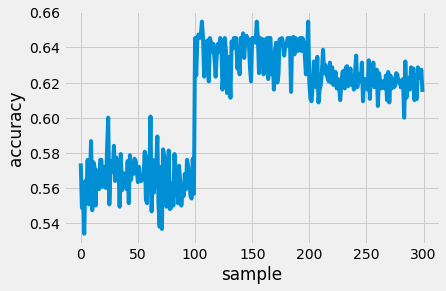

In [799]:
# plot sample (x-axis) versus accuracy (y-axis)
plt.plot(sample, accuracy)
plt.xlabel('sample')
plt.ylabel('accuracy')

In [800]:
from sklearn.metrics import f1_score
f1_score = []
sample = []
for i in range(n_B):
    f1_score.append(metrics.f1_score(y_pred[i], y_test))
    sample.append(i)

Text(0, 0.5, 'f1_score')

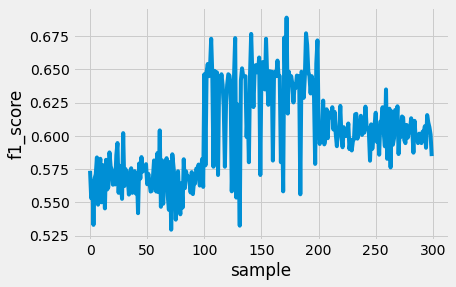

In [801]:
# plot sample (x-axis) versus f1_score (y-axis)
plt.plot(sample, f1_score)
plt.xlabel('sample')
plt.ylabel('f1_score')

In [802]:
print('accuracy tree clasifier:', np.mean(accuracy[0:99]))
print('accuracy tree clasifier 2:', np.mean(accuracy[100:199]))
print('accuracy logistic regression:', np.mean(accuracy[200:299]))
print('accuracy Total:', np.mean(accuracy[0:299]))

accuracy tree clasifier: 0.5657710437710437
accuracy tree clasifier 2: 0.6382222222222222
accuracy logistic regression: 0.6212323232323232
accuracy Total: 0.6083901895206243


# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [803]:
y_pred.sum(axis=1).head()

1483    283
2185    262
2520    252
3721    276
3727     19
dtype: int64

In [804]:
y_pred_f = (y_pred.sum(axis=1) >= (n_B / 6)).astype(np.int)

from sklearn import metrics
print('f1 score modelo bagging majority voting:', metrics.f1_score(y_pred_f, y_test))
print('accuracy modelo bagging majority voting:', metrics.accuracy_score(y_pred_f, y_test))

f1 score modelo bagging majority voting: 0.7003848268279275
accuracy modelo bagging majority voting: 0.6366666666666667


# Exercise 7.9

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [853]:
def perf_measure(y_actual, y_hat):
    columna = y_hat.shape[1]
    TP = np.arange(len(y_hat))
    FN = np.arange(len(y_hat))
    PP = np.zeros(len(y_hat))
    for i in range(len(y_hat)):
        TP[i] = 0
        FN[i] = 0
        PP[i] = 0
        for col in range(columna):
            if (y_actual.iloc[i])== (y_hat.iloc[i,col])==1:
                TP[i] = TP[i] + 1
                
            if y_hat.iloc[i,col]==0 and y_actual.iloc[i]!=y_hat.iloc[i,col]:
                FN[i] = FN[i] + 1
        if TP[i] +  FN[i] == 0:  
            PP[i] = 0
        else:
            PP[i] = ((TP[i])/((TP[i])+(FN[i])))
                                
    return(PP)

In [854]:
prob_TP = pd.DataFrame(perf_measure(y_test, y_pred))

In [858]:
prob_TP.head(10)

,0
0,0.000000
1,0.873333
2,0.000000
3,0.920000
4,0.000000
5,0.526667
6,0.000000
7,0.000000
8,0.383333
9,0.846667


In [856]:
from sklearn import metrics
f1_score = []
for th in np.arange(0, 1, 0.05).tolist():
    y_pred_f = (prob_TP >= (th)).astype(np.int)
    f1_score.append(metrics.f1_score(y_pred_f, y_test))

Text(0, 0.5, 'f1_score')

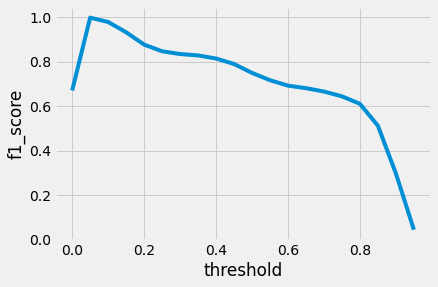

In [857]:
# plot threshold (x-axis) versus f1_score (y-axis)
plt.plot(np.arange(0, 1, 0.05).tolist(), f1_score)
plt.xlabel('threshold')
plt.ylabel('f1_score')

In [859]:
# show the best f1_score and the corresponding probability threshold
sorted(zip(f1_score, np.arange(0, 1, 0.05).tolist()))[::-1][0]

(0.9980119284294234, 0.05)

In [860]:
from sklearn import metrics
accuracy = []
for th in np.arange(0, 1, 0.05).tolist():
    y_pred_f = (prob_TP >= (th)).astype(np.int)
    accuracy.append(metrics.accuracy_score(y_pred_f, y_test))

Text(0, 0.5, 'accuracy')

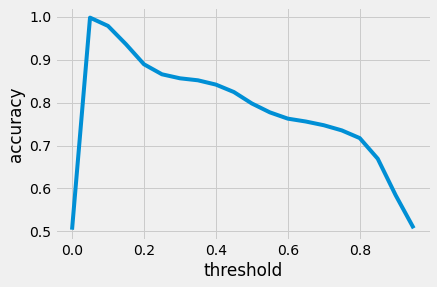

In [861]:
# plot threshold (x-axis) versus accuracy (y-axis)
plt.plot(np.arange(0, 1, 0.05).tolist(), accuracy)
plt.xlabel('threshold')
plt.ylabel('accuracy')

# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [722]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [723]:
errors = np.zeros(n_B)

for i in range(n_B):
    y_pred_ = models[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

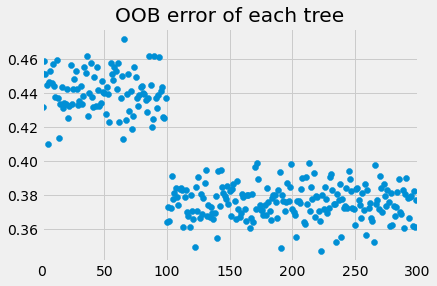

In [724]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_B), errors)
plt.xlim([0, n_B])
plt.title('OOB error of each tree')

In [725]:
alpha = (1 - errors) / (1 - errors).sum()

In [726]:
weighted_sum_1 = ((y_pred) * alpha).sum(axis=1)

In [727]:
weighted_sum_1.head(5)

1483    0.947635
2185    0.882777
2520    0.851936
3721    0.925827
3727    0.058627
dtype: float64

In [728]:
y_pred_o = (weighted_sum_1 >= 0.5).astype(np.int)

print('f1 score modelo bagging majority voting:', metrics.f1_score(y_pred_o, y_test))
print('accuracy modelo bagging majority voting:', metrics.accuracy_score(y_pred_o, y_test))

f1 score modelo bagging majority voting: 0.6248275862068966
accuracy modelo bagging majority voting: 0.6373333333333333


# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [771]:
y_pred_

array([[0.44497243, 0.55502757],
       [0.36614238, 0.63385762],
       [0.48405442, 0.51594558],
       ...,
       [0.65772506, 0.34227494],
       [0.68864077, 0.31135923],
       [0.27738411, 0.72261589]])

In [787]:
errors = np.zeros(n_B)
THRESHOLD = 0.5
for i in range(n_B):
    y_pred_ = np.where(models[i].predict_proba(X_train.iloc[samples_oob[i]])[:,1] >= THRESHOLD, 1, 0)
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

In [788]:
alpha = (1 - errors) / (1 - errors).sum()

In [789]:
weighted_sum_1 = ((y_pred) * alpha).sum(axis=1)

In [790]:
from sklearn import metrics
f1_score = []
for th in np.arange(0, 1, 0.05).tolist():
    y_pred_wv = (weighted_sum_1 >= (th)).astype(np.int)
    f1_score.append(metrics.f1_score(y_pred_wv, y_test))

Text(0, 0.5, 'f1_score')

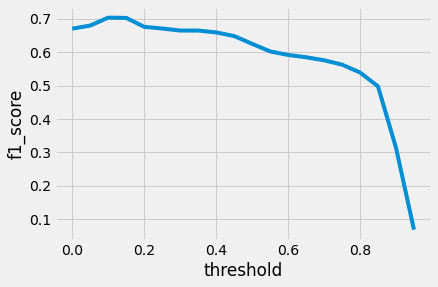

In [791]:
# plot threshold (x-axis) versus f1_score (y-axis)
plt.plot(np.arange(0, 1, 0.05).tolist(), f1_score)
plt.xlabel('threshold')
plt.ylabel('f1_score')

In [792]:
# show the best accuracy and the corresponding max_depth
sorted(zip(f1_score, np.arange(0, 1, 0.05).tolist()))[::-1][0]

(0.7032859244727808, 0.1)

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [629]:
import warnings
warnings.filterwarnings('ignore')

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# grow one tree for each bootstrap sample and make predictions on testing data

models = {}
for i, sample in enumerate(samples):
    #X_train = train.iloc[sample, 1:]
    #y_train = train.iloc[sample, 0]
    if i < 100:
        models[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=123)
        models[i].fit(X_train.iloc[sample,:], y_train.iloc[sample])
        y_pred[i] = models[i].predict(X_test)
    if  100 <= i < 200:
        models[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=123)
        models[i].fit(X_train.iloc[sample,:], y_train.iloc[sample])      
        y_pred[i] = models[i].predict(X_test)
    if  i >= 200: 
        models[i] = LogisticRegression()
        models[i].fit(X_train.iloc[sample,:], y_train.iloc[sample])  
        y_pred[i] = models[i].predict(X_test)

In [630]:
# DataFrame for storing predicted price from each tree
X_train_2 = pd.DataFrame(index=X_train.index, columns=[list(range(n_B))])

# grow one tree for each bootstrap sample and make predictions on testing data

for i in range(n_B):
    X_train_2[i] = models[i].predict(X_train)

In [631]:
from sklearn.linear_model import LogisticRegressionCV

In [632]:
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [633]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_B)))
for i in range(n_B):
    y_pred_df.iloc[:, i] = models[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,0,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,0,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3727,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [635]:
y_pred_f = lr.predict(y_pred_df)

In [636]:
metrics.f1_score(y_pred_f, y_test), metrics.accuracy_score(y_pred_f, y_test)

(0.6561886051080551, 0.65)

In [761]:
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
f1_score = []
for THRESHOLD in threshold_list:
    preds = np.where(lr.predict_proba(y_pred_df)[:,1] > THRESHOLD, 1, 0)
    f1_score.append(metrics.f1_score(preds, y_test))

Text(0, 0.5, 'f1_score')

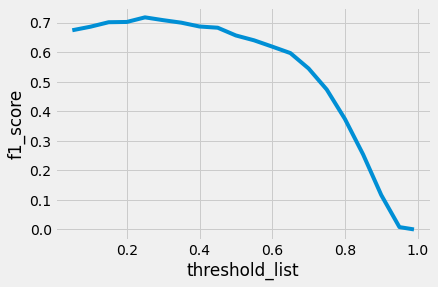

In [763]:
# plot threshold (x-axis) versus f1_score (y-axis)
plt.plot(threshold_list, f1_score)
plt.xlabel('threshold_list')
plt.ylabel('f1_score')

In [764]:
# show the best accuracy and the corresponding max_depth
sorted(zip(f1_score, np.arange(0, 1, 0.05).tolist()))[::-1][0]

(0.717436974789916, 0.2)